<a href="https://colab.research.google.com/github/pumazzo/ML4HS-UC/blob/main/homeworks/Homework1_ML4HS_UC2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework - week 1
## python and numpy exercises

Homeworks can be done in a group.

Please, create a github account and upload your colab notebook.
Send me the link to the repository.


Sometimes I ask to use a specific numpy function.
Go to the documentation to check how it works
https://numpy.org/doc/1.25/reference/index.html#reference


***Exercise 1: Matrix Multiplication***

Description: Write a function to perform matrix multiplication using NumPy.
Use

```
np.dot(A,B)
#the transpose of a matrix can be fuond using np.transpose() or A.T
```


When dimentions do not match you can transpose, this exercise is about array manipulation and we don't care about the result

In [11]:
import numpy as np
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
C = np.random.rand(4,2)
D =  np.random.rand(4,4)

In [12]:
def mat_mul(A, B):
    # verify if shape of the matrices matches
    if B.shape[0] == A.shape[1]:
        return np.dot(A, B)
    elif B.shape[1] == A.shape[1]:
        return np.dot(A, np.transpose(B))
    else:
        raise Exception("Can't multiply matrices, shapes do not match")
    

# AxB
print(mat_mul(A, B))

#AxC
print(mat_mul(A, C))

#(BxC)xD
print(mat_mul(mat_mul(B, C), D))

[[19 22]
 [43 50]]
[[1.33321862 1.61800052 1.9044664  2.20572304]
 [2.69870382 3.91181677 3.8665178  5.15843168]]
[[20.6863459  10.52723353 17.75009661 10.24132782]
 [28.02591205 14.32088234 24.0572282  13.82214207]]


***Exercise 2: Matrix creation***

Description: Write a function to define a matrix following the instruction



1.   Create a random matrix 8x8 with only negative elements. The principal diagonal must have all elements < -1 . All other elements are < 0 and > -1
```
#useful functions
np.diag()#diagonal matrix
np.randon.rand()#generates number between 0 and 1, it has size argument
#remenber that you can sum matrices and multiply them with a scalar
```

2.   Create a random tensor NxMx3.
The third dimention is usually called the channel dimention (like color channels in an image).

The first channel i.e. A[:,:,0] has only radom positive values.

The second channel has values distributed as a gaussian with mean = 3 and standard deviation = 1.

The third channel has the element by element sum of squares of the first two channels.

Both N and M are user defined.
```
#useful functions
np.abs()#take the absolute value of a number (it works on tensor)
np.randon.randn()#generates normal distibuted numbers
np.concatenate() # concatenate dimentions
# also you can use stack to merge channels
np.stack()
```

3. Generate a 8x8 matrix. The fist element is 1, the second one is 2 ...., the last element is 64.

```
# you can use arange to generate numbers in a range
np.arange()
# you can reshape a vector in a matrix...
```





In [88]:
# 1
# first we construct a matrix with positive values, and at the end 
# we are going to multiply it by -1

# considering that, we will generate a matrix where the diagonal has
# only elements >1, and the other elements of the matrix are random
# numbers between 0 and 1 


def r_matrix():
    # generate a 8x8 matrix with random numbers between 0 and 1
    M = np.random.rand(8, 8)
    
    # to generate numbers >1 we will use that 1/x>1 if 0<x<1
    for i in range(len(M)):
        # modify elements in the diagonal
        M[i][i] = 1 / M[i][i]

    return -1*M

print("\nSolution 1:")
print(r_matrix())

# 2
def r_tensor(N, M):
    # channel 1: positive random numbers 
    c1 = np.random.rand(N, M)
    # channel 2: gaussian random numbers with mean = 3 and std = 1
    c2 = 3 + np.random.randn(N, M)    
    # channel 3: element by element sum of squares of the first two channels
    c3 = c1**2 + c2**2
    
    return np.stack([c1, c2, c3], axis=0)

print("\nSolution 2:")
print(r_tensor(3, 4))

# 3
def c_matrix():
    # create a vector from 1 to 64
    M = np.arange(1, 65, 1)
    # reshape vector into an 8x8 matrix
    M = M.reshape(8, 8)
    return M

print("\nSolution 3:")
print(c_matrix())


Solution 1:
[[-2.35322476e+00 -9.61413379e-02 -1.20495484e-02 -7.57538114e-01
  -6.04595142e-01 -6.77444950e-01 -9.94568402e-01 -1.67908435e-01]
 [-2.03979676e-01 -2.81640855e+00 -7.56342025e-01 -2.32669005e-01
  -4.65778136e-01 -2.71782706e-01 -4.31951508e-02 -4.91444092e-01]
 [-2.43286528e-02 -7.84378637e-01 -1.77522243e+00 -7.94123967e-01
  -3.39692445e-01 -6.31015737e-01 -7.82175029e-01 -4.82665177e-01]
 [-8.86360533e-01 -2.48021073e-01 -2.27081709e-01 -1.39632993e+00
  -6.67071132e-01 -6.66430964e-01 -5.67789909e-02 -8.30778931e-01]
 [-2.82364744e-02 -6.75419726e-01 -3.68581898e-01 -8.63763829e-01
  -2.40091724e+00 -1.87987475e-04 -6.31845972e-01 -4.56898263e-02]
 [-8.23526774e-01 -2.26239626e-01 -7.76696192e-01 -1.19314749e-01
  -2.35904106e-01 -1.11557433e+00 -1.67791722e-01 -3.05792363e-02]
 [-1.61112133e-01 -9.53858334e-01 -2.72994777e-01 -9.79699951e-01
  -4.41163624e-01 -9.65558334e-01 -1.03370555e+00 -6.53370264e-02]
 [-7.23550069e-01 -6.38546993e-01 -3.80913092e-01 -7.985

***Exercise 4: Decision Boundaries***


Description: I will provide an example to:
- Generate data
- Split the data
- Train a classifier
- Record performance
- Plot the decision curves on a plane

 Using this template, generate the dataset described and compare the results of linear regression and K-NN. You can try different models also.


K-NN accuracy: 0.8
Logistic Regression accuracy: 0.825


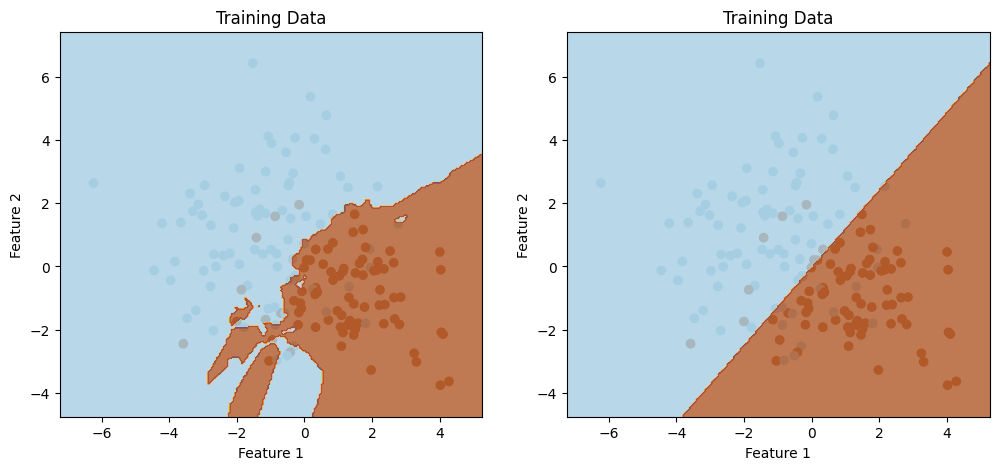

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Generate synthetic data with linear decision boundary
np.random.seed(42)

# Number of data points per class
num_samples = 100

# Generate two classes with linear decision boundary
class_0_mean = [-1, 1]
class_0_cov = [[4, 0], [0, 4]]
class_1_mean = [1, -1]
class_1_cov = [[2, 0], [0, 2]]

class_0_data = np.random.multivariate_normal(class_0_mean, class_0_cov, num_samples)
class_1_data = np.random.multivariate_normal(class_1_mean, class_1_cov, num_samples)

# Create the target labels (0 and 1)
class_0_labels = np.zeros(num_samples)
class_1_labels = np.ones(num_samples)

# Combine the data and labels
X = np.vstack((class_0_data, class_1_data))
y = np.hstack((class_0_labels, class_1_labels))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the models
knn = KNeighborsClassifier(n_neighbors=5)  # K-NN classifier
log_reg = LogisticRegression()  # Logistic Regression

knn.fit(X_train, y_train)
log_reg.fit(X_train, y_train)

# Predict using the models
y_pred_knn = knn.predict(X_test)
y_pred_log_reg = log_reg.predict(X_test)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

print("K-NN accuracy:", accuracy_knn)
print("Logistic Regression accuracy:", accuracy_log_reg)

# Plot the decision boundary for K-NN and Logistic Regression
def plot_boundary(X_train, knn, log_reg):
  plt.figure(figsize=(12, 5))

  plt.subplot(1, 2, 1)
  plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired)
  plt.title("Training Data")
  plt.xlabel("Feature 1")
  plt.ylabel("Feature 2")
  #plt.xlim(-6, 6)
  #plt.ylim(-6, 6)

  h = .05  # step size in the mesh
  x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
  y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)

  plt.subplot(1, 2, 2)
  plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired)
  plt.title("Training Data")
  plt.xlabel("Feature 1")
  plt.ylabel("Feature 2")
  #plt.xlim(-6, 6)
  #plt.ylim(-6, 6)

  Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)

  plt.show()

# plot boundaries
plot_boundary( X_train,knn,log_reg)

***part I: Linearly separable datasets ***


A,B,C,D are gaussian distributions with $$mean = \mu$$ and $$cov = \alpha*\sigma$$.

For simplicity assume a diagonal covariance matrix.

$\alpha$ is a user defined parameter. Fix it at 0.5 at start


$$\mu_A = [1,1] $$
$$\mu_B = [0,0] $$
$$\mu_C = [-1,-1]$$
$$\mu_D = [1,-1]$$


Dataset 1 has point of class 0 sampled from A and B and points of class one sampled from C


Dataset 2 has points of class 0 sampled from A and C and points of class one sampled from B


Dataset 3 haspoints of class 0 sampled from A and C and points of class one sampled from D


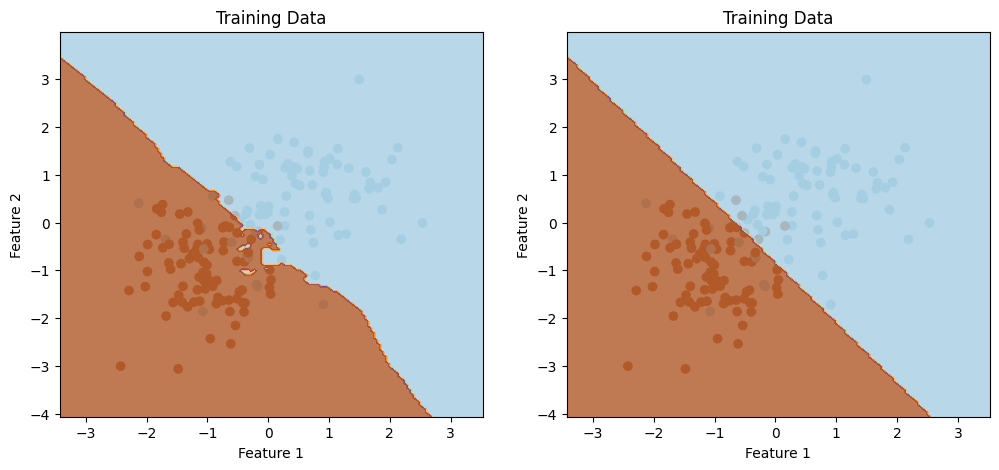

K-NN accuracy: 0.9 	Logistic Regression accuracy: 0.95


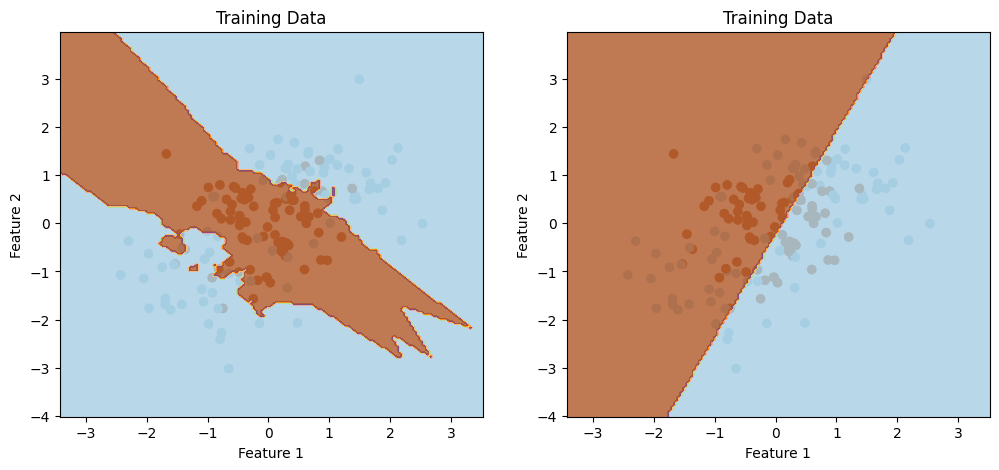

K-NN accuracy: 0.75 	Logistic Regression accuracy: 0.525


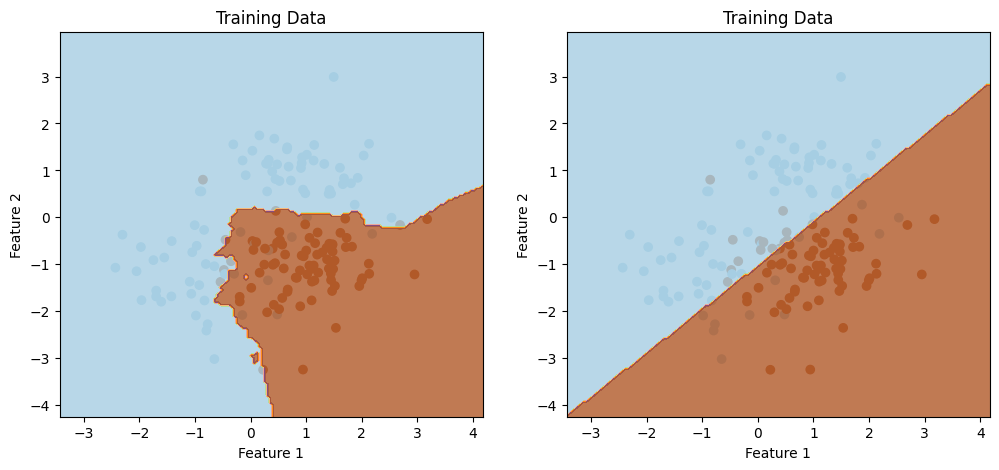

K-NN accuracy: 0.825 	Logistic Regression accuracy: 0.8


In [100]:
#
a = 0.5

# Number of data points per class
num_samples = 100

# Define means and covariance matrix
mean_A = [1, 1]
mean_B = [0, 0]
mean_C = [-1, -1]
mean_D = [1, -1]
cov = [[a, 0], [0, a]]

# generate data
class_0_data_A = np.random.multivariate_normal(mean_A, cov, num_samples//2)
class_0_data_B = np.random.multivariate_normal(mean_B, cov, num_samples//2)
class_0_data_C = np.random.multivariate_normal(mean_C, cov, num_samples//2)

class_1_data_B = np.random.multivariate_normal(mean_B, cov, num_samples)
class_1_data_C = np.random.multivariate_normal(mean_C, cov, num_samples)
class_1_data_D = np.random.multivariate_normal(mean_D, cov, num_samples)

# Create the target labels (0 and 1)
class_0_labels = np.zeros(num_samples)
class_1_labels = np.ones(num_samples)

# generate datasets
X1 = np.vstack((class_0_data_A, class_0_data_B, class_1_data_C))
X2 = np.vstack((class_0_data_A, class_0_data_C, class_1_data_B))
X3 = np.vstack((class_0_data_A, class_0_data_C, class_1_data_D))
y = np.hstack((class_0_labels, class_1_labels))
dataset_1 = [X1, y]
dataset_2 = [X2, y]
dataset_3 = [X3, y]
datasets = [dataset_1, dataset_2, dataset_3]

def train_models(X, y):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train the models
    knn = KNeighborsClassifier(n_neighbors=5)  # K-NN classifier
    log_reg = LogisticRegression()  # Logistic Regression

    knn.fit(X_train, y_train)
    log_reg.fit(X_train, y_train)
    
    return X_train, y_train, X_test, y_test, knn, log_reg

# here we will store the output from train_models(X, y)
X_trains = []
y_trains = []
X_tests = []
y_tests = []
knns = []
log_regs = []

# we iterate over all datasets
for dataset in datasets:
    X_train, y_train, X_test, y_test, knn, log_reg = train_models(dataset[0], dataset[1])
    # saving the output
    X_trains.append(X_train)
    y_trains.append(y_train)
    X_tests.append(X_test)
    y_tests.append(y_test)
    knns.append(knn)
    log_regs.append(log_reg)


# Plot the decision boundary for K-NN and Logistic Regression
def plot_boundary(X_train, y_train, X_test, y_test, knn, log_reg):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired)
    plt.title("Training Data")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    #plt.xlim(-6, 6)
    #plt.ylim(-6, 6)

    h = .05  # step size in the mesh
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)

    plt.subplot(1, 2, 2)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired)
    plt.title("Training Data")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    #plt.xlim(-6, 6)
    #plt.ylim(-6, 6)

    Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)

    plt.show()
    
    # Predict using the models
    y_pred_knn = knn.predict(X_test)
    y_pred_log_reg = log_reg.predict(X_test)

    # Calculate accuracy
    accuracy_knn = accuracy_score(y_test, y_pred_knn)
    accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

    print("K-NN accuracy:", accuracy_knn, "\tLogistic Regression accuracy:", accuracy_log_reg)

# plot boundaries for every dataset
for i in range(len(datasets)):
    plot_boundary(X_trains[i], y_trains[i], X_tests[i], y_tests[i], knns[i], log_regs[i])

*part II: Non Linearly separable datasets *

Here there is an example of a common toy dataset generated with sk-learn.

https://scikit-learn.org/stable/datasets/sample_generators.html#generated-datasets

Modify the code to work with make_circle instead. (it is a line).

Play with both datasets.

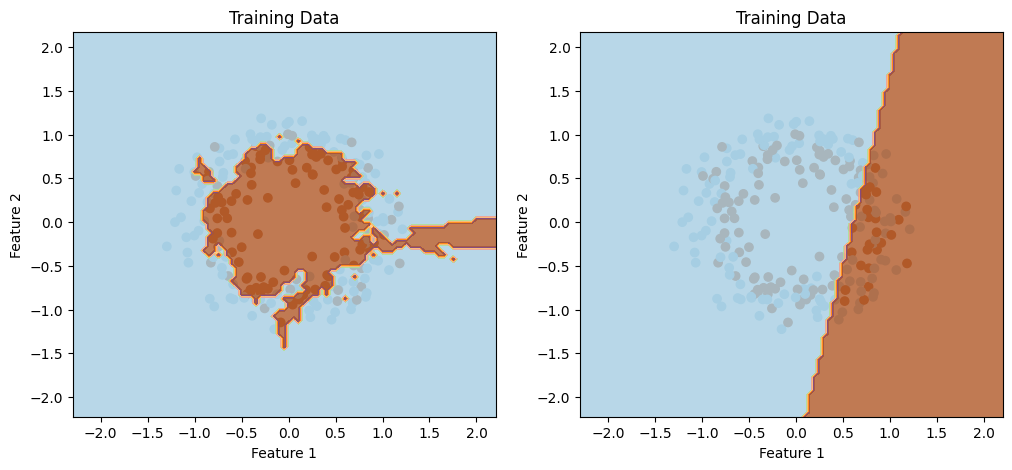

K-NN accuracy: 0.5833333333333334 	Logistic Regression accuracy: 0.4166666666666667


In [106]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score

# Generate synthetic data with a non-linear decision boundary
np.random.seed(42)

# Number of data points
num_samples = 300

# Generate non-linearly separable data using the make_moons function
X, y =  make_circles(n_samples=num_samples, noise=0.15, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the models
knn = KNeighborsClassifier(n_neighbors=5)  # K-NN classifier
log_reg = LogisticRegression()  # Logistic Regression

knn.fit(X_train, y_train)
log_reg.fit(X_train, y_train)

# plot boundaries
plot_boundary(X_train, y_train, X_test, y_test, knn, log_reg)

# An example of a situation in which LR is better than K-NN




It is difficult to compete with K-NN,as an algorithm, it is clearly superior to logistic regression because it is non linear, it can take into account all the correlations between features and it can “draw” arbitrary decision boundaries.
Its weaknesses are the speed in inference when you have a big dataset and that  it is noisy when you have small datasets.

To build a toy dataset in which LR is better than  K-NN we can
- Generate random normal dataset (N = 200) with high variance and covariance in a high dimensional space (D = 20).
- Create a linear decision boundary only on a low dimensional projection (D=2 in this case, the first two features)

K-NN performance also depend strongly on its hyperparameter k (the number of point that are considered neighbours)

Try to modify this code to find the best k in this case:

- Split the train dataset in train/validation
- Try all (loop over it) k = [1,20] recording performances on the validation set
Plot Accuracy vs k and find k* the k at which accuracy is maximum
- Test the model using k*


*** NB. The first figure is the covariance matrix,

the second is the scatterplot on the projection in which the decison line is

the tird one is a different projection ***

You can try to plot the decision boundaries modifing the code that I made but it is expensive because you would have to create a grid of points in a D=20 space.

You can however:
 - generate the grid only on D = 1,2 (where the boundary is) and D = 3,4 where there is no boundary
 - then add a constant value to all other dimensions (usually the average)
 - use this dataset to plot the decision plane

Correlation between correlated variables and y:
[ 0.58057682 -0.49091576  0.07155189 -0.02757502  0.0787929  -0.14941111
 -0.20770642 -0.04570724 -0.32363184 -0.02552429  0.04334976  0.01454253
 -0.0046148   0.24972762  0.19748766 -0.06294623  0.32899774 -0.1582541
 -0.03540708  0.20600273]


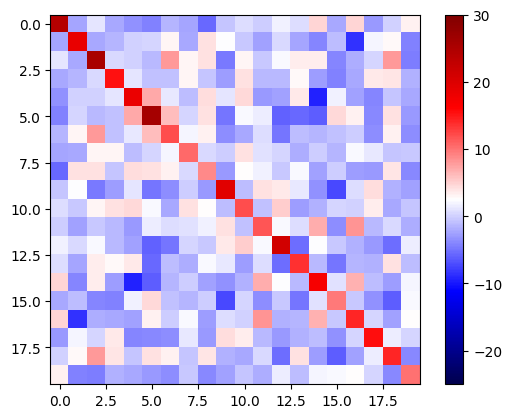

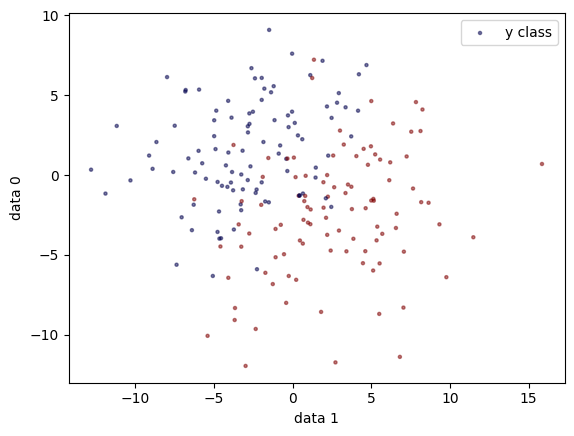

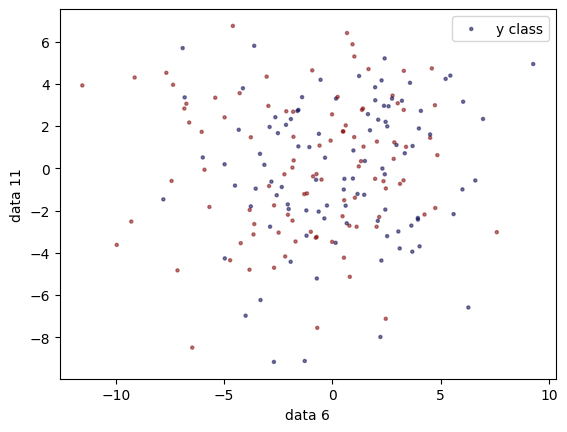

<Figure size 640x480 with 0 Axes>

In [121]:
# Set random seed for reproducibility
np.random.seed(123)

def generate_dataset(N, D, num_samples, W):
    # Generate correlated variables
    covariance_matrix = 1*np.random.randn(N, N)
    diagonal_values = 1*np.ones(N)
    np.fill_diagonal(covariance_matrix, diagonal_values)
    covariance_matrix = 0.8*np.dot(covariance_matrix, covariance_matrix.T)

    # Ensure positive definiteness using Cholesky decomposition
    L = np.linalg.cholesky(covariance_matrix)
    covariance_matrix = np.dot(L, L.T)

    X = np.random.multivariate_normal(np.zeros(N), covariance_matrix, num_samples)

    # Take correlated variables with target
    correlated_vars = X[:,:D]

    # take  uncorrelated variables
    uncorrelated_vars = X[:,D:]



    # Generate target weigths variable y
    weights = np.expand_dims(np.array(W),axis=1)

    # Generate target variable y as a weighted sum of correlated variables
    #y = np.dot(correlated_vars, weights) + 0.15*np.random.randn(num_samples, 1)
    bias = 0.2*np.random.randn()
    logits = np.dot(correlated_vars, weights) + bias
    probabilities = 1 / (1 + np.exp(-logits))
    y = np.random.binomial(1, probabilities)


    # Combine correlated and uncorrelated variables
    X = np.concatenate((correlated_vars, uncorrelated_vars), axis=1)

    # Print correlation between correlated variables and y
    correlations = np.corrcoef(np.concatenate((X, y), axis=1), rowvar=False)
    corr_with_y = correlations[:-1, -1]
    print("Correlation between correlated variables and y:")
    print(corr_with_y)

    y = y.squeeze()


    return X, y,covariance_matrix

# Parameters
N = 20  # Number of total variables
D = 2   # Number of correlated variables
num_samples = 200

# Generate dataset
weights = [0.6,-0.6]
X, y,covariance_matrix = generate_dataset(N, D, num_samples,weights)
plt.imshow(covariance_matrix,cmap="seismic",vmin=-25,vmax=30)
plt.colorbar()

#plot in the separation plane projection
plt.figure()
plt.scatter(X[:,0],X[:,1],c=y,s=5,alpha =0.5,cmap="seismic",label = "y class")
plt.xlabel("data 1")
plt.ylabel("data 0")
plt.legend()
#plot in a random plane projection
plt.figure()
plt.scatter(X[:,6],X[:,11],c=y,s=5,alpha =0.5,cmap="seismic",label = "y class")
plt.xlabel("data 6")
plt.ylabel("data 11")
plt.legend()
#plt.colorbar()
plt.figure()


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def train_log_reg(X_train, y_train, X_test, y_test):
    # Create and train the model
    log_reg = LogisticRegression(penalty='l1',solver="liblinear",C=0.5, max_iter=500)  # Logistic Regression

    log_reg.fit(X_train, y_train)
    
    # Predict using the model
    y_pred_log_reg = log_reg.predict(X_test)

    # Calculate accuracy
    accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
    
    return log_reg, accuracy_log_reg

def train_knn(X_train, y_train, X_test, y_test, k):
    # Create and train the model
    knn = KNeighborsClassifier(n_neighbors=k)  # K-NN classifier

    knn.fit(X_train, y_train)

    # Predict using the model
    y_pred_knn = knn.predict(X_test)

    # Calculate accuracy
    accuracy_knn = accuracy_score(y_test, y_pred_knn)
    
    return knn, accuracy_knn



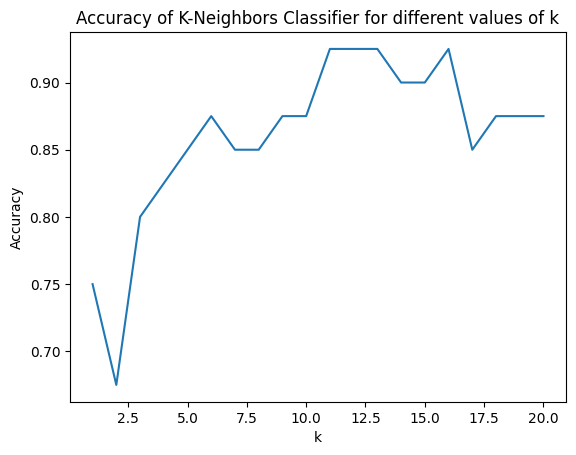

In [122]:
ks = [i for i in range(1, 21)]
accuracy_k = [] 
knns = []

for k in ks:
    knn, accuracy_knn = train_knn(X_train, y_train, X_test, y_test, k)
    accuracy_k.append(accuracy_knn)
    knns.append(knn)

plt.figure()
plt.plot(ks, accuracy_k)
plt.ylabel("Accuracy")
plt.xlabel("k")
plt.title("Accuracy of K-Neighbors Classifier for different values of k")
plt.show()

# as k=11 is one of the points where we have a maximum, we will consider this as the model we are using
knn = knns[10]
knn_accuracy = accuracy_k[10]
log_reg, log_reg_accuracy = train_log_reg(X_train, y_train, X_test, y_test)

In [124]:
print(log_reg.coef_)

#plot in the separation plane projection
plt.figure()
plt.scatter(X[:,0],X[:,1],c=y,s=5,alpha =0.5,cmap="seismic",label = "y class")
plt.xlabel("data 1")
plt.ylabel("data 0")
plt.legend()
#plot in a random plane projection
plt.figure()
plt.scatter(X[:,6],X[:,11],c=y,s=5,alpha =0.5,cmap="seismic",label = "y class")
plt.xlabel("data 6")
plt.ylabel("data 11")
plt.legend()
#plt.colorbar()
plt.figure()

[[ 0.63908944 -0.47103952 -0.02730987  0.04396565  0.16659552 -0.02542773
  -0.04880532  0.01005635  0.00731364 -0.07005891  0.07588007  0.
  -0.04966723  0.          0.10583521  0.         -0.01828124  0.
   0.02469632 -0.08946311]]


# Other resources:
you can find a comparison on toy dataset for different ML models on the documentation of sk.learn

https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py